In [5]:
import torch
torch.manual_seed(10)
torch.set_printoptions(precision=2)

from model import Model
import matplotlib.pyplot as plt
import torchvision.transforms as T 
from PIL import Image
from torch.profiler import profile, record_function, ProfilerActivity

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [6]:


model = Model()
model.load_pretrained_model()

path_train = '../data/train_data.pkl'
path_val = '../data/val_data.pkl'

noisy_imgs_1, noisy_imgs_2 = torch.load(path_train)
# noisy_imgs_1 = noisy_imgs_1#[:10000]
# noisy_imgs_2 = noisy_imgs_2#[:10000]

noisy_imgs , clean_imgs = torch.load(path_val)
# noisy_imgs = noisy_imgs.float()/256
# clean_imgs = clean_imgs.float()/256


In [7]:
noisy_imgs_1.shape[0]

50000

In [8]:
# model.train(noisy_imgs_1, noisy_imgs_2, 50)
out = model.predict(noisy_imgs)

In [9]:
# torch.save(model.model.state_dict(),'bestmodel.pth')
# model = torch.load_state_dict('bestmodel.pth')

In [10]:
# def psnr(denoised, ground_truth):
#     mse = torch.mean(torch.mean((denoised-ground_truth)**2,dim=(1,2,3)))
#     return -10 * torch.log10(mse + 10**(-8))

# psnr(out.cpu().float()/256, clean_imgs.float()/256)

In [11]:
def compute_psnr(x, y, max_range=1.0):
    assert x.shape == y.shape and x.ndim == 4
    return 20 * torch.log10(torch.tensor(max_range)) - 10 * torch.log10(((x-y)**2).mean((1,2,3))).mean()
print("psnr: ", compute_psnr(out.cpu().float()/256, clean_imgs.float()/256))
def compute_psnr_all(x, y, max_range=1.0):
    assert x.shape == y.shape and x.ndim == 4
    return 20 * torch.log10(torch.tensor(max_range)) - 10 * torch.log10(((x-y)**2).mean((1,2,3)))
psnrs = torch.round(compute_psnr_all(out.cpu().float()/256, clean_imgs.float()/256), decimals=2)

psnr:  tensor(25.43)


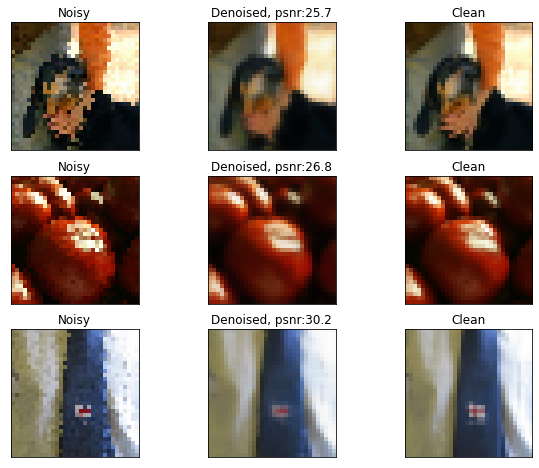

In [12]:
transform = T.ToPILImage()
k_all = [15,99,39]

plt.figure(figsize = [10, 8])
k = k_all[0]
plt.subplot(3, 3,1)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Noisy")
plt.imshow(transform(noisy_imgs[k]));
plt.subplot(3, 3,2)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Denoised, psnr:{:.1f}".format(psnrs[k]))

plt.imshow(transform(out[k]/256));
plt.subplot(3, 3,3)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Clean")
plt.imshow(transform(clean_imgs[k]));

k=k_all[1]
plt.subplot(3, 3,4)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Noisy")
plt.imshow(transform(noisy_imgs[k]));
plt.subplot(3, 3,5)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Denoised, psnr:{:.1f}".format(psnrs[k]))

plt.imshow(transform(out[k]/256));
plt.subplot(3, 3,6)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Clean")
plt.imshow(transform(clean_imgs[k]));

k = k_all[2]
plt.subplot(3, 3,7)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Noisy")
plt.imshow(transform(noisy_imgs[k]));
plt.subplot(3, 3,8)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Denoised, psnr:{:.1f}".format(psnrs[k]))

plt.imshow(transform(out[k]/256));
plt.subplot(3, 3,9)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Clean")
plt.imshow(transform(clean_imgs[k]));

# plt.savefig("results_denoised_7.png", pad_inches=0.01,dpi=300)


In [13]:
# import matplotlib.pyplot as plt
# plt.plot(model.loss_train.detach().cpu())
# plt.title("Training Loss")
# plt.savefig('loss_train_.png', dpi=300, pad_inches=0.01 )

In [14]:
plt.plot(model.loss_valid.detach().cpu())

AttributeError: 'Model' object has no attribute 'loss_valid'

In [15]:
results = torch.load('Net-6.pickle')

In [16]:
results.keys()

dict_keys(['psnr', 'bs', 'm', 'best_m', 'best_bs', 'lr_all', 'psnr_lr', 'best_lr', 'best_psnr', 'loss_train', 'loss_val', 'loss_train_lr', 'loss_val_lr', 'loss_train_best', 'loss_val_best'])

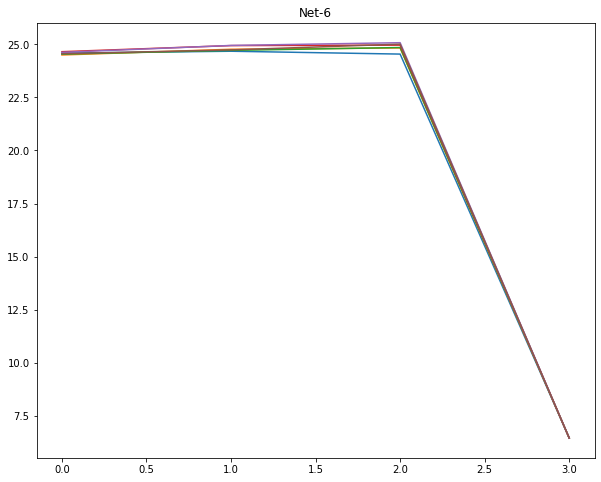

In [17]:
plt.figure(figsize = [10, 8])
plt.title("Net-6")
plt.plot(results['psnr'])

In [18]:
results['psnr']

[[tensor(24.59),
  tensor(24.50),
  tensor(24.54),
  tensor(24.65),
  tensor(24.62),
  tensor(24.56)],
 [tensor(24.68),
  tensor(24.77),
  tensor(24.72),
  tensor(24.94),
  tensor(24.95),
  tensor(24.74)],
 [tensor(24.54),
  tensor(24.83),
  tensor(24.85),
  tensor(24.96),
  tensor(25.08),
  tensor(25.01)],
 [tensor(6.46),
  tensor(6.46),
  tensor(6.46),
  tensor(6.46),
  tensor(6.46),
  tensor(6.46)]]